In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-6d3c06a5-9f40-b9fc-48fb-e2ea35210f75)


In [ ]:
pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 24kB/s 
  Found existing installation: torch 0.3.0.post4
    Uninstalling torch-0.3.0.post4:
      Successfully uninstalled torch-0.3.0.post4


In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [ ]:
cuda_enable = True
x = torch.cuda.FloatTensor(1)
x.get_device()

0

In [5]:
import torchvision
from torchvision import transforms, datasets

In [8]:
train =  datasets.MNIST("", train=True, download=True, 
                        transform=transforms.Compose([transforms.ToTensor()]))
test =   datasets.MNIST("", train=False, download=True, 
                        transform=transforms.Compose([transforms.ToTensor()]))

In [12]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [15]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [17]:
x, y = data[0][0], data[1][0]
print(y)

tensor(2)


torch.Size([1, 28, 28])
torch.Size([28, 28])


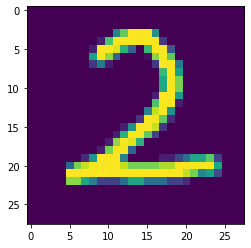

In [21]:
import matplotlib.pyplot as plt
print(x.shape) # got the shape which  is three dim
print(x.view(28,28).shape) # decrease the dim to 2 then plt works
plt.imshow(x.view(28,28))
plt.show()


In [26]:
total_counter = 0
counter_dict = {
    0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0
}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)]+=1
    total_counter+=1
print(counter_dict)

for i in counter_dict:
  print(f"{i}:  {counter_dict[i]/total_counter*100}")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0:  9.871666666666666
1:  11.236666666666666
2:  9.93
3:  10.218333333333334
4:  9.736666666666666
5:  9.035
6:  9.863333333333333
7:  10.441666666666666
8:  9.751666666666667
9:  9.915000000000001
